In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def multi_reversing(df,col_id, col_values):
    """la funcion toma nos da la frecuencia de los datos distribuidos en distintas columnas.
    Toma una variable distribuida en varias columnas (one hot encoding), y aplica la funcion melt para cambiar el formato
    de la tabla a long. Luego devuelve una columna donde aparece el nombre de cada columna, la cantidad de veces que fue
    marcada con una 'x' (si accuracy fue marcada 50 veces, aparecera el str 'accuracy' 50 veces, lo que permite graficar su frecuencia
    de aparicion)

    Args:
        df (dataframe): dataframe con el que se desea trabajar, debe poseer las columnas de id_vars y list_value_vars
        in_id_vars (str): nombre de la columna que se usa como identificador de variables 
        value_vars (str o lista): str o lista con el nombre de las columnas de las cuales se desea obtener los datos (se puede
        obviamente subsetear (p.e. dataframe.iloc['columna_1',...,columna_n']))

    Returns:
        dataframe: _description_
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value == 'x']

def multi_reversing_n(df,col_id, col_values):
    """exactamente lo mismo que multi_reversing, solo que para casos donde lo que se busca es un numero y no una x
    """
    df_raw = pd.melt(df, id_vars = col_id, value_vars = col_values)
    return df_raw[df_raw.value != 0]

Para Agus: centrarse en las Hojas de eda y techniques. 
Buscar hacer graficos de frecuencia para tecnicas y para modalidad
y de la hoja de eda la frecuencia de uso de los dispositivos de eda (por ejemplo). 


### Emotion elicitation - Plots

 graficos para hojas: techniques:

- frecuencia por modalidad
- frecuencia por technique_name: DONE
- task activo or passive: DONE
- por modalidad visual (pictures, videos, words, other)
- por modalidad auditiva (musica otro)
- elicitation time
- multiple techniques?
- frecuencia desde driving a puzzle

In [3]:
data_elicitation = pd.read_csv('../Emmanuel/data/cleaned/Tabla Normalizada - Emotion elicitation techniques.csv')
data_elicitation.fillna('-', inplace= True)

#### Gráfico Técnicas utilizadas - emotion elicitación standarized techniques

In [4]:
working_data = data_elicitation[data_elicitation['technique_name']!= '-']  #me quedo solo con las rows que usaron tecnicas estandarizadas
working_data.groupby('technique_name')[['paper_id', 'model_id']].count()

# Unifico las categorias y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping = {
    'Stroop color-word interference test’’ (SCWT)':'Stoop color word interfence test (SCWT)',
    'TSST':'Trier Social Stress Test (TSST)',
    'Trier social stress test' : 'Trier Social Stress Test (TSST)'
        }

working_data['technique_name'] = working_data['technique_name'].replace(mapping)
working_data['technique_name'].value_counts()


C:\Users\agust\AppData\Local\Temp/ipykernel_19128/1473114421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['technique_name'] = working_data['technique_name'].replace(mapping)


IAPS                                       29
Trier Social Stress Test (TSST)            22
Flickr                                     15
Stoop color word interfence test (SCWT)    10
Rapid-ABC                                   7
Robin                                       6
Visit website with interruptions            5
Stroop                                      5
-G25\r\nLogitech steering wheel kit         3
IADS                                        2
Multimodal Dyadic Behavior (MMDB)           1
Name: technique_name, dtype: int64

In [5]:
working_data['technique_name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

IAPS                                       27.6%
Trier Social Stress Test (TSST)            21.0%
Flickr                                     14.3%
Stoop color word interfence test (SCWT)     9.5%
Rapid-ABC                                   6.7%
Robin                                       5.7%
Visit website with interruptions            4.8%
Stroop                                      4.8%
-G25\r\nLogitech steering wheel kit         2.9%
IADS                                        1.9%
Multimodal Dyadic Behavior (MMDB)           1.0%
Name: technique_name, dtype: object

c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


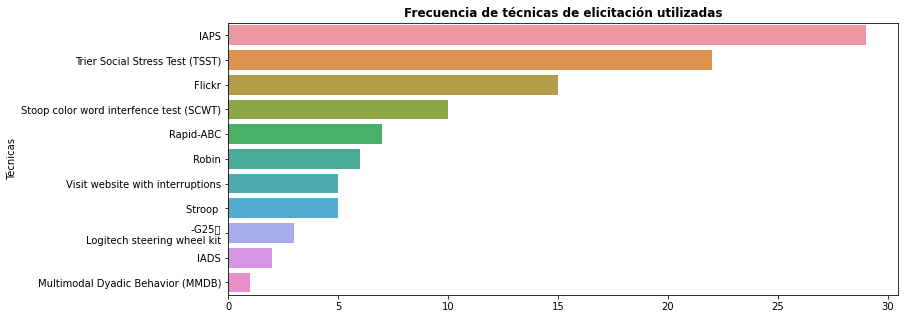

In [6]:
#Plot
plt.figure(figsize = (12,5))
sns.countplot(y = 'technique_name',
            data = working_data,
            order = working_data['technique_name'].value_counts().index)
plt.title('Frecuencia de técnicas de elicitación utilizadas', fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Técnicas')
plt.show()

Entre las 4 técnicas estandarizadas utilizadas se encuentra un predominio del uso de IAPS con un 27.6%, seguido por Trier Social Stress Test (TSST) con un 21% el Flickr con un 14.3% y el Stoop color word interfence test (SCWT) con un 9.5%.

comentario: chequear si Flickr realmente es una tecnica estandarizada

#### Task ACTIVE or PASSIVE

In [7]:
task_type = multi_reversing(data_elicitation, 'model_id', data_elicitation[['task_type_active','task_type_pasive']])
task_type['variable'].value_counts()

task_type_pasive    240
task_type_active     80
Name: variable, dtype: int64

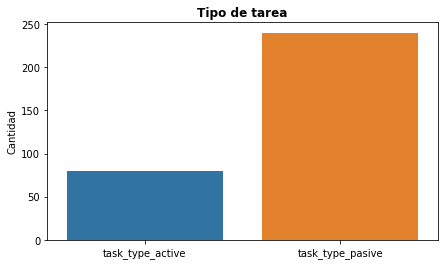

In [8]:
#Plot
plt.figure(figsize = (7,4))
sns.countplot(x = 'variable',
            data = task_type)
plt.title('Tipo de tarea',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Cantidad', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10,)
plt.show()

#### FRECUENCY BY MODALITY

In [10]:
df_modality = multi_reversing(data_elicitation, 'model_id', data_elicitation[['modality_visual','modality_auditory', 'modality_somatosensory']])
df_modality['variable'].value_counts()

modality_visual           335
modality_auditory         277
modality_somatosensory      9
Name: variable, dtype: int64

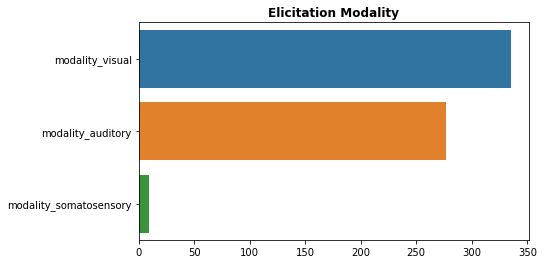

In [11]:
#Plot
plt.figure(figsize = (7,4))
sns.countplot(y = 'variable',
            data = df_modality)
plt.title('Elicitation Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### By visual modality (pictures, videos, words, other)

In [12]:
data_elicitation.loc[:,'visual_pictures':'visual_other']

#Aca tengo el problema del modelo 2 que esta completo con '?'Se podría modificar tabla normalizada corrigiendolo

df_visual_modality = multi_reversing(data_elicitation, 'model_id', data_elicitation.loc[:,'visual_pictures':'visual_other'])
df_visual_modality['variable'].value_counts()

visual_videos      243
visual_pictures     45
visual_words         6
Name: variable, dtype: int64

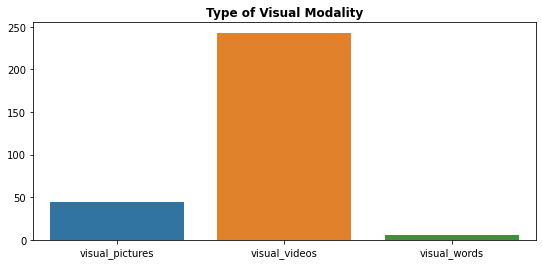

In [13]:
#Plot
plt.figure(figsize = (9,4))
sns.countplot(x = 'variable',
            data = df_visual_modality)
plt.title('Type of Visual Modality',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

#### Frecuencia desde driving a puzzle

In [14]:
data_elicitation.loc[:, 'technique_clasif_driving':'technique_clasif_Other']
other_classification_tech = multi_reversing(data_elicitation, 'model_id',data_elicitation.loc[:, 'technique_clasif_driving':'technique_clasif_Other'])
other_classification_tech['variable'].value_counts()

technique_clasif_Social interactions                        28
technique_clasif_Meditation                                 28
technique_clasif_driving                                    11
technique_clasif_Virtual Reality                             4
technique_clasif_Ux                                          2
technique_clasif_Reading                                     1
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     1
technique_clasif_Videogame                                   1
Name: variable, dtype: int64

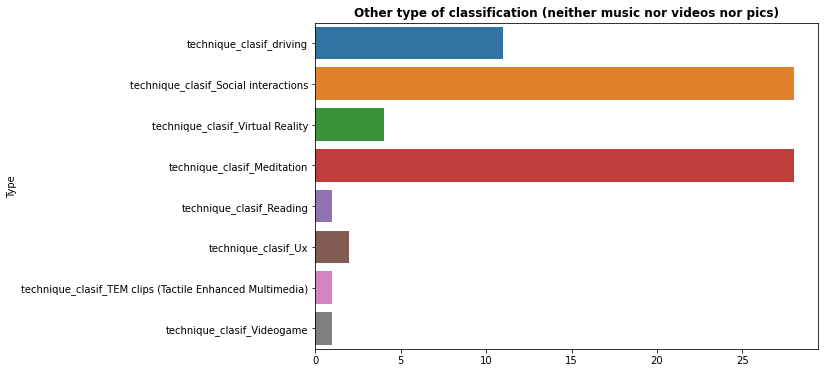

In [15]:
#Plot
plt.figure(figsize = (9,6))
sns.countplot(y = 'variable',
            data = other_classification_tech)
plt.title('Other type of classification (neither music nor videos nor pics)',
            fontweight = 'bold',
            fontsize = 12)
plt.ylabel('Type', fontsize = 10)
plt.xlabel('')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [16]:
other_classification_tech['variable'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

technique_clasif_Social interactions                        36.8%
technique_clasif_Meditation                                 36.8%
technique_clasif_driving                                    14.5%
technique_clasif_Virtual Reality                             5.3%
technique_clasif_Ux                                          2.6%
technique_clasif_Reading                                     1.3%
technique_clasif_TEM clips (Tactile Enhanced Multimedia)     1.3%
technique_clasif_Videogame                                   1.3%
Name: variable, dtype: object

Al indagar acerca de otras formas de elicitacion (no videos, imagenes o audio) se encuentra de un predominio de Social Interactions y Meditation, ambas con un 36.8%.
En 3er lugar se encuentran Driving Tasks con un 14.5% y en 4to lugar Virtual Reality con un 5.3%

#### EDA

In [17]:
df_eda = pd.read_csv('../Emmanuel\\data\\cleaned\\Tabla Normalizada - EDA.csv')
df_eda = df_eda.fillna('-')
eda_working_data = df_eda[df_eda['eda_device_specification']!= '-']  #me quedo solo con las rows que usaron dispositivos

In [18]:
#Importamos libreria para reducir las inconsistencias de las categorias
from thefuzz import fuzz


main_categories = ['BIOPAC', 'Empatica','GSR2','Sociograph', 'Variport', 'Shimmer', 'BioRadio 150', 'Affectiva-QSensors5','ProComp Infinity','PowerLab', 'Grove']

def reduce_categories(list_categories):
    '''
    esta función toma una lista de categorias y reemplaza por ellas a las rows con categorías similares
    
    ej: reemplaza por BIOPAC a 'BIOPAC 150'

    '''
    for category in list_categories:
        for i in eda_working_data.loc[:,'eda_device_specification']:
            if fuzz.ratio(category, i) > 45:
                eda_working_data.loc[:,'eda_device_specification'] = eda_working_data.loc[:,'eda_device_specification'].replace({i:category})

# Reducimos algunas categorías a partir de la funcion reduce_categories
reduce_categories(main_categories)

# Aún quedan algunas categorias sin unificar asi que unifico las restantes y resuelvo las inconsistencias por diferencias de tipeo o abreviaciones
mapping_eda = {'MP150 Biopac': 'BIOPAC', 'MP35 Biopac' : 'BIOPAC','MP150':'BIOPAC',
                'PowerLab (manufactured\r\nby ADInstruments)': 'PowerLab',
                'Affectiva-QSensors5': 'Q Sensor by Afectiva',
                'Shimmer3 GSR+ Unit sensor':'Shimmer',
                'sensors produced by Thought Technology' : 'Thought Technology',
                'Grove\r\n(a standalone LM324 quadruple operational amplifier based on EDA sensor kit)':'Grove',
                'Grove GSR sensor produced by Seeed':'Grove',
                'Gen II integrated wearable device from Analog Devices, Inc': 'Gen II Analog Devices'
                
                }


eda_working_data.loc[:,'eda_device_specification'] = eda_working_data.loc[:,'eda_device_specification'].replace(mapping_eda)

eda_working_data['eda_device_specification'].value_counts()

c:\Users\agust\anaconda3\lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
c:\Users\agust\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


BIOPAC                                          80
PowerLab                                        44
Grove                                           33
Shimmer                                         21
GSR2                                            15
Biosignalplux                                   12
Empatica                                        12
BioRadio 150                                    11
RespiBAN Professional                           10
Q Sensor by Afectiva                             9
LabVIEW                                          9
Mindfield eSense                                 5
Thought Technology                               4
BioNeuro multichannel biofeedback instrument     4
Microsoft Band 2                                 3
ProComp Infinity                                 3
Nexus-10                                         2
(BITalino (r)evolution Plugged\r\nKit BT         2
Variport                                         2
Sociograph                     

In [19]:
#In percentage
#Plot
eda_working_data['eda_device_specification'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

BIOPAC                                          28.1%
PowerLab                                        15.4%
Grove                                           11.6%
Shimmer                                          7.4%
GSR2                                             5.3%
Biosignalplux                                    4.2%
Empatica                                         4.2%
BioRadio 150                                     3.9%
RespiBAN Professional                            3.5%
Q Sensor by Afectiva                             3.2%
LabVIEW                                          3.2%
Mindfield eSense                                 1.8%
Thought Technology                               1.4%
BioNeuro multichannel biofeedback instrument     1.4%
Microsoft Band 2                                 1.1%
ProComp Infinity                                 1.1%
Nexus-10                                         0.7%
(BITalino (r)evolution Plugged\r\nKit BT         0.7%
Variport                    

c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\agust\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


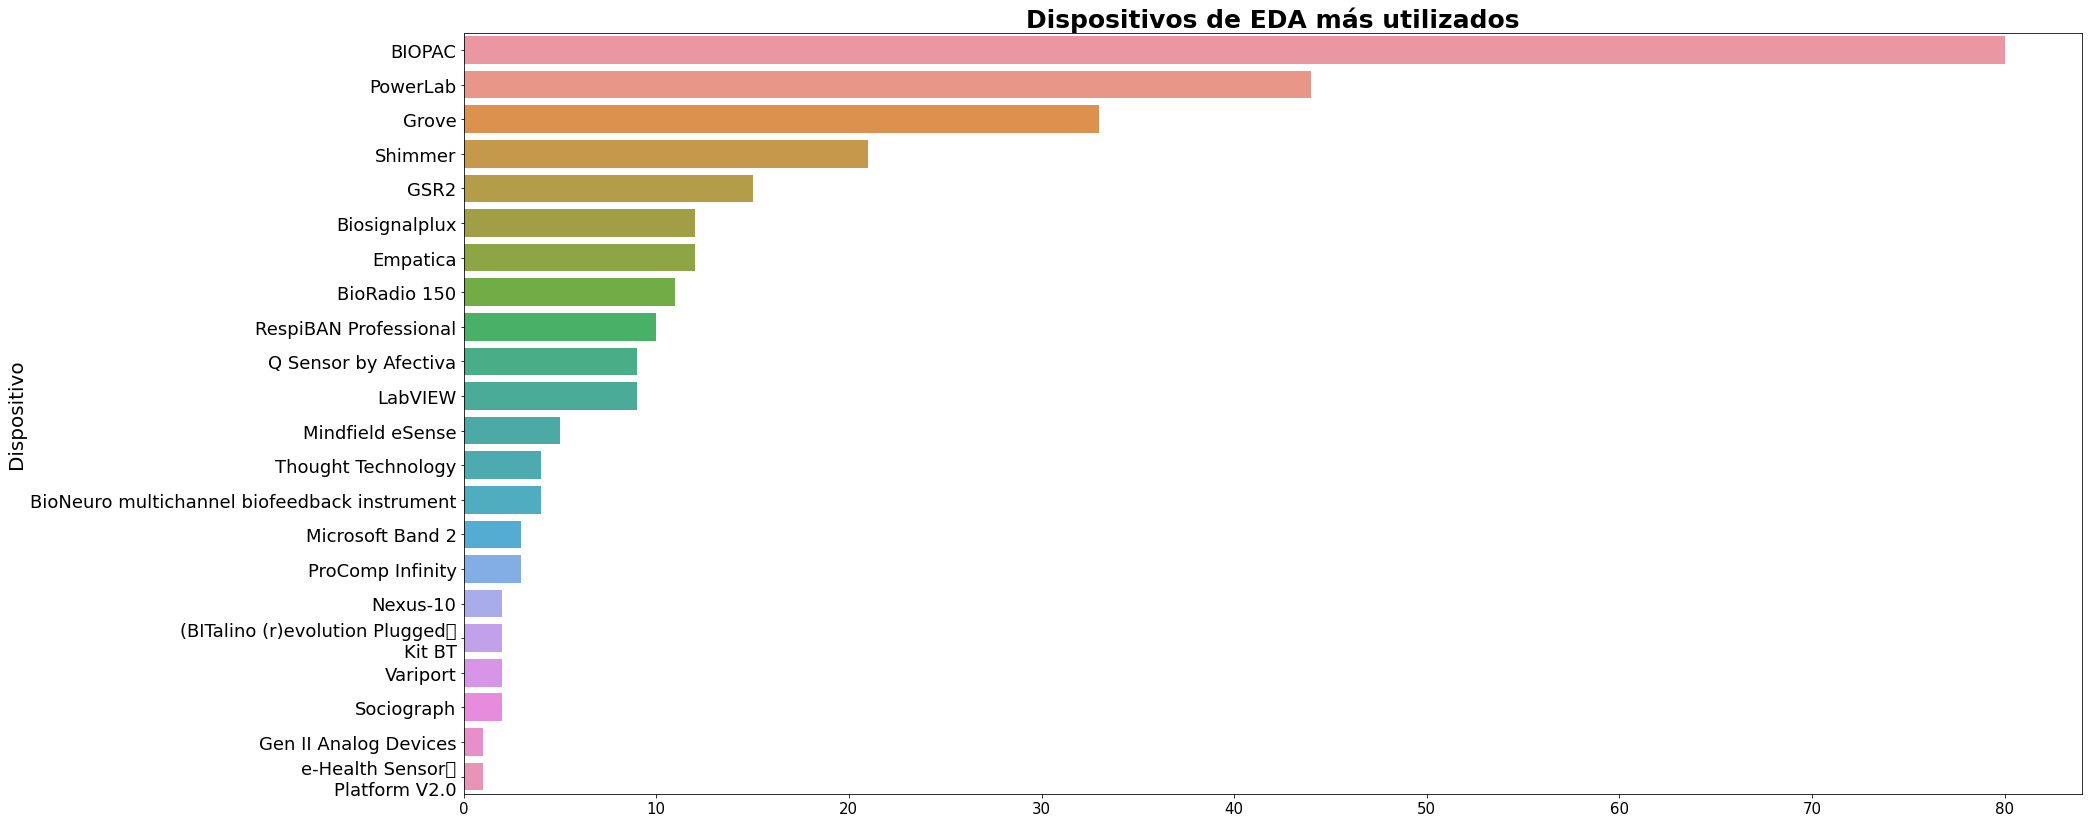

In [20]:
#Plot
plt.figure(figsize = (29,14))
sns.countplot(y = 'eda_device_specification',
            data = eda_working_data,
            order = eda_working_data['eda_device_specification'].value_counts().index)
plt.title('Dispositivos de EDA más utilizados',
            fontweight = 'bold',
            fontsize = 25)
plt.ylabel('Dispositivo', fontsize = 20)
plt.xlabel('')
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

Se podría hacer en el plot de arriba de agrupar a los que tengan 4 o menos en 'otros' para limpiar el plot

In [22]:
#Aquellos que tenian una frecuencia de 4 o menos los agrupamos en 'Others'
mapping_others = {'Thought Technology': 'Others',
                'BioNeuro multichannel biofeedback instrument': 'Others',
                'Microsoft Band 2': 'Others',
                'ProComp Infinity': 'Others',
                'Nexus-10': 'Others',
                '(BITalino (r)evolution Plugged\r\nKit BT': 'Others',
                'Variport': 'Others',
                'Sociograph': 'Others',
                'Gen II Analog Devices': 'Others',
                'e-Health Sensor\r\nPlatform V2.0': 'Others'
}


devices_with_others = eda_working_data.copy()

devices_with_others.loc[:,'eda_device_specification'] = devices_with_others.loc[:,'eda_device_specification'].replace(mapping_others)
devices_with_others['eda_device_specification'].value_counts()


BIOPAC                   80
PowerLab                 44
Grove                    33
Others                   24
Shimmer                  21
GSR2                     15
Empatica                 12
Biosignalplux            12
BioRadio 150             11
RespiBAN Professional    10
LabVIEW                   9
Q Sensor by Afectiva      9
Mindfield eSense          5
Name: eda_device_specification, dtype: int64

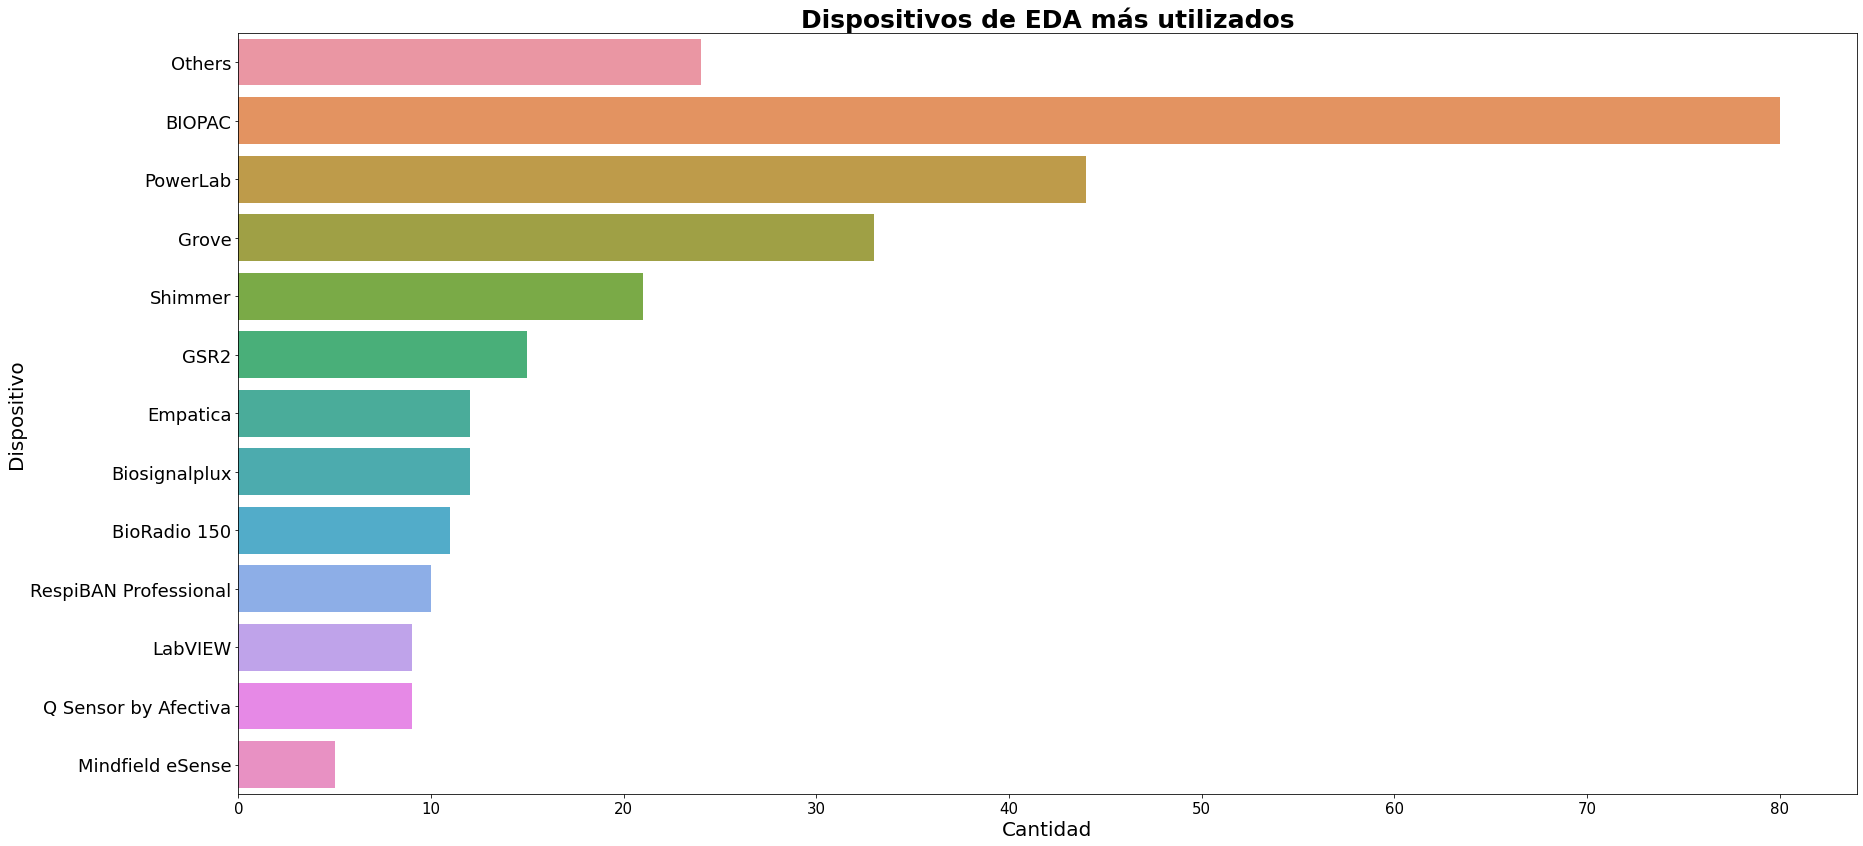

In [23]:
#Orden
plot_order = [ 'Others','BIOPAC', 'PowerLab', 'Grove','Shimmer','GSR2','Empatica','Biosignalplux', 'BioRadio 150',
 'RespiBAN Professional','LabVIEW', 'Q Sensor by Afectiva', 'Mindfield eSense']

#Plot
plt.figure(figsize = (29,14))
sns.countplot(y = 'eda_device_specification',
            data = devices_with_others,
            order = plot_order)
plt.title('Dispositivos de EDA más utilizados',
            fontweight = 'bold',
            fontsize = 25)
plt.ylabel('Dispositivo', fontsize = 20)
plt.xlabel('Cantidad', fontsize = 20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()